In [ ]:
!pip install yfinance

In [ ]:

!pip install yfinance pandas_datareader

In [ ]:
import yfinance as yf
stock = yf.Ticker("AAPL")  # Using Apple's stock symbol
data = stock.history(period="1y")  # Fetching data for 1 year

In [ ]:
data.dropna(inplace=True)  # This removes any rows with missing values

In [ ]:
import pandas as pd
data.index = pd.to_datetime(data.index)

In [ ]:
data['Daily Return'] = data['Close'].pct_change()

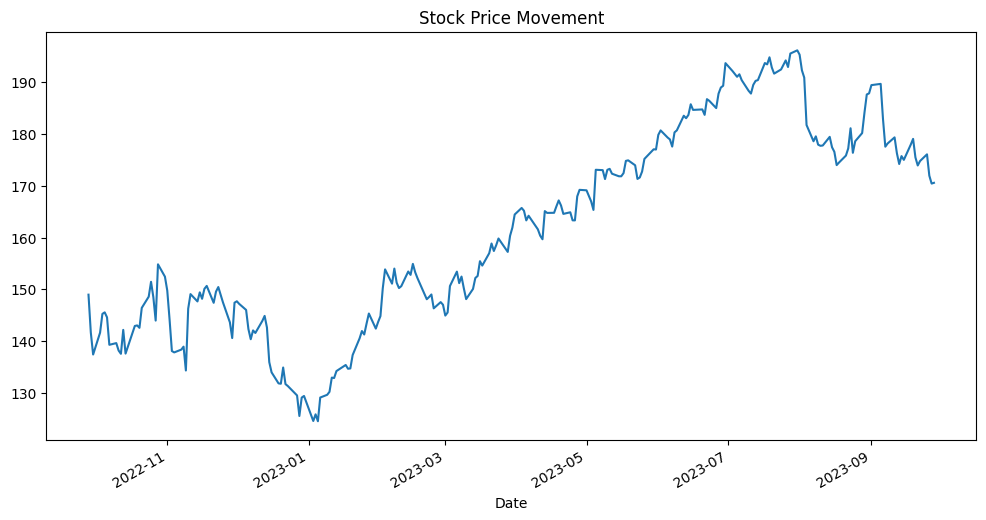

In [ ]:
import matplotlib.pyplot as plt

data['Close'].plot(figsize=(12, 6), title="Stock Price Movement")
plt.show()

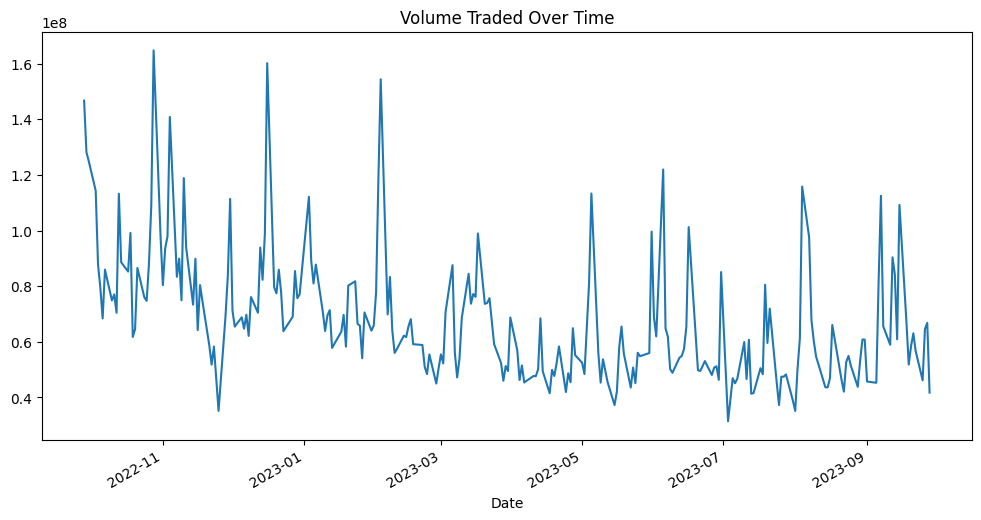

In [ ]:
data['Volume'].plot(figsize=(12, 6), title="Volume Traded Over Time")
plt.show()

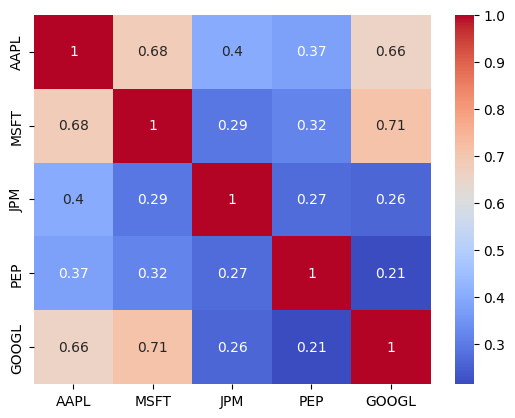

In [ ]:

import seaborn as sns

stock_list = ["AAPL", "MSFT", "JPM", "PEP", "GOOGL"]
close_prices = pd.DataFrame()

for stock in stock_list:
   close_prices[stock] = yf.Ticker(stock).history(period="1y")['Close']

correlation = close_prices.pct_change().corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

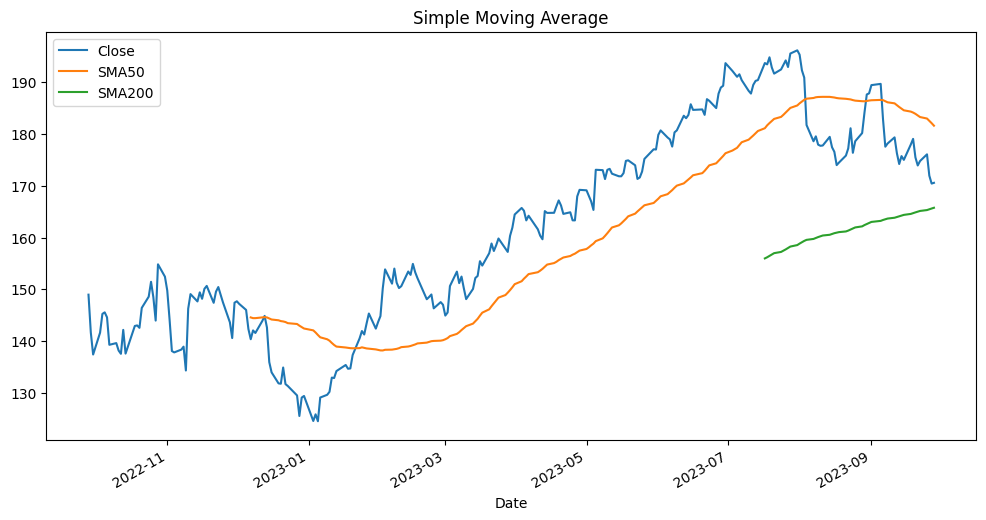

In [ ]:
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

data[['Close', 'SMA50', 'SMA200']].plot(figsize=(12,6))
plt.title('Simple Moving Average')
plt.show()

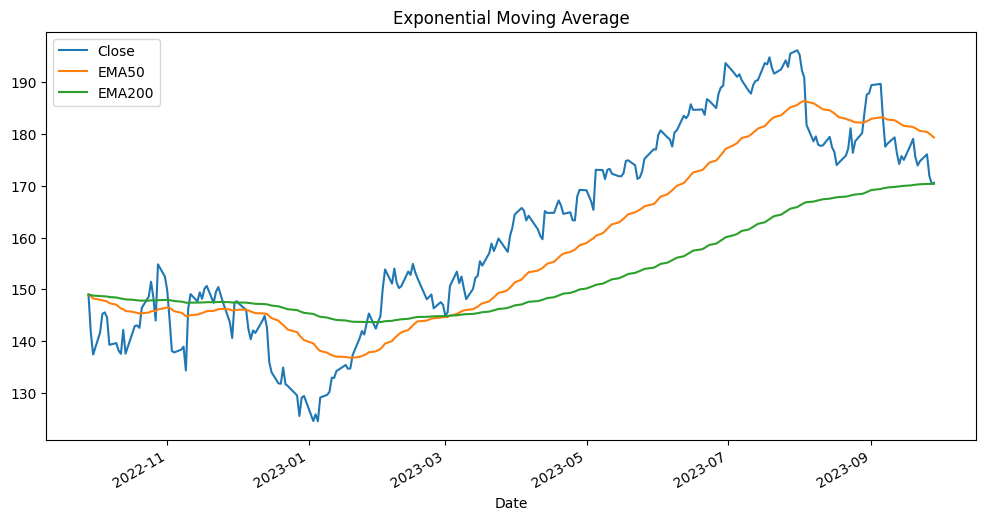

In [ ]:
data['EMA50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA200'] = data['Close'].ewm(span=200, adjust=False).mean()

data[['Close', 'EMA50', 'EMA200']].plot(figsize=(12,6))
plt.title('Exponential Moving Average')
plt.show()

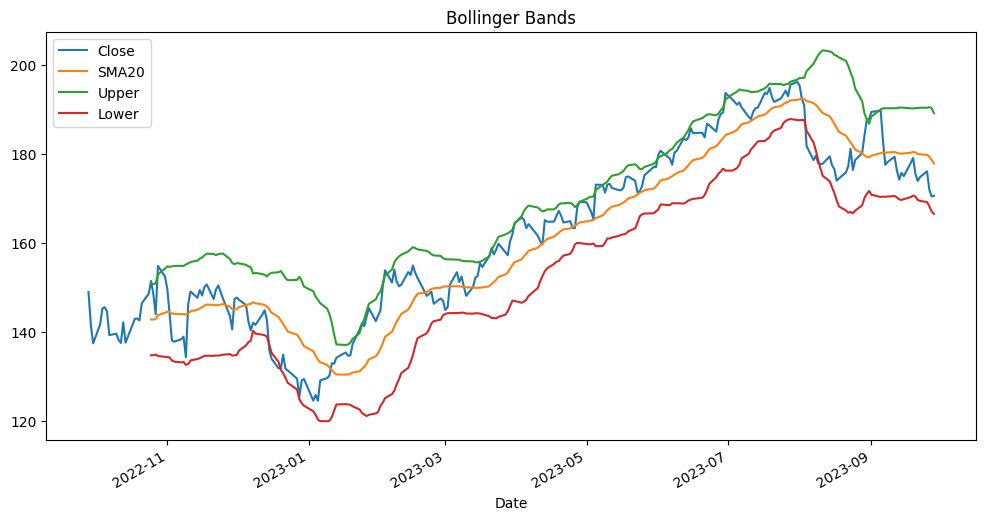

In [ ]:
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['Upper'] = data['SMA20'] + 2*data['Close'].rolling(window=20).std()
data['Lower'] = data['SMA20'] - 2*data['Close'].rolling(window=20).std()

data[['Close', 'SMA20', 'Upper', 'Lower']].plot(figsize=(12,6))
plt.title('Bollinger Bands')
plt.show()

In [ ]:
from scipy.optimize import minimize
import numpy as np

# Assuming stock_list contains the symbols of the stocks in the portfolio
returns = close_prices.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 10000
risk_free_rate = 0.0178 # example value

# Portfolio optimization function
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
   returns = np.sum(mean_returns*weights ) *252
   std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
   return std, returns

# Minimize negative Sharpe Ratio to get optimal portfolio
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
   p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
   return -(p_ret - risk_free_rate) / p_var

# Constraints for optimization
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Running the optimization
initial = [1./len(stock_list) for stock in stock_list]
bounds = tuple((0, 1) for asset in range(len(stock_list)))
result = minimize(neg_sharpe_ratio, initial, args=(mean_returns, cov_matrix, risk_free_rate), bounds=bounds, constraints=constraints)
print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.594090900658491
       x: [ 0.000e+00  1.602e-01  7.037e-01  0.000e+00  1.361e-01]
     nit: 6
     jac: [ 4.762e-01 -8.316e-02 -8.307e-02  1.856e-01 -8.296e-02]
    nfev: 36
    njev: 6
